In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Define different objective functions and their gradients for each algorithm
def f_gd(x):
    """Simple quadratic function: f(x) = x^2"""
    return x**2

def grad_f_gd(x):
    """Gradient: f'(x) = 2x"""
    return 2 * x

def f_batch(x):
    """Quadratic with linear term: f(x) = x^2 + 2x"""
    return x**2 + 2 * x

def grad_f_batch(x):
    """Gradient: f'(x) = 2x + 2"""
    return 2 * x + 2

def f_mini(x):
    """Non-linear function: f(x) = x^4 - 4x^2"""
    return x**4 - 4 * x**2

def grad_f_mini(x):
    """Gradient: f'(x) = 4x^3 - 8x"""
    return 4 * x**3 - 8 * x

def f_sgd(x):
    """Oscillatory function: f(x) = sin(3x) + x^2"""
    return np.sin(3 * x) + x**2

def grad_f_sgd(x):
    """Gradient: f'(x) = 3cos(3x) + 2x"""
    return 3 * np.cos(3 * x) + 2 * x

def f_momentum(x):
    """Steep valley function: f(x) = 10x^2 + sin(x)"""
    return 10 * x**2 + np.sin(x)

def grad_f_momentum(x):
    """Gradient: f'(x) = 20x + cos(x)"""
    return 20 * x + np.cos(x)

def f_rmsprop(x):
    """Complex oscillatory: f(x) = x^2 + cos(2x)"""
    return x**2 + np.cos(2 * x)

def grad_f_rmsprop(x):
    """Gradient: f'(x) = 2x - 2sin(2x)"""
    return 2 * x - 2 * np.sin(2 * x)

def f_adam(x):
    """Highly non-linear: f(x) = x^2 + sin(x) + cos(2x)"""
    return x**2 + np.sin(x) + np.cos(2 * x)

def grad_f_adam(x):
    """Gradient: f'(x) = 2x + cos(x) - 2sin(2x)"""
    return 2 * x + np.cos(x) - 2 * np.sin(2 * x)

# Common plotting setup
x_vals = np.linspace(-5, 5, 100)

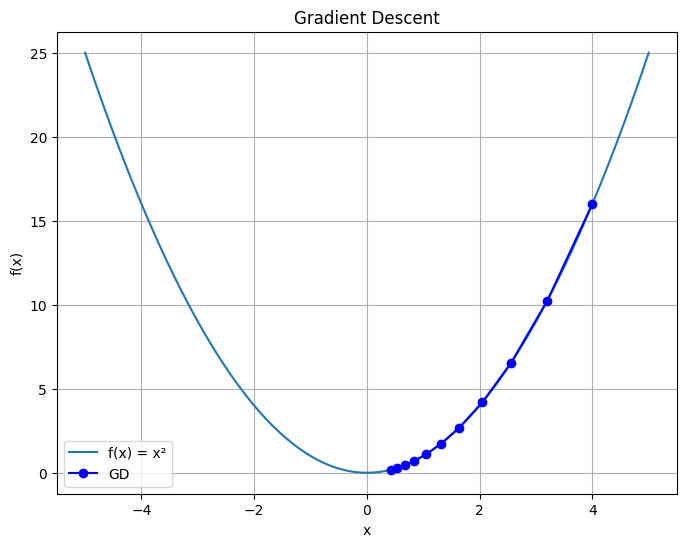

In [ ]:
# Gradient Descent
x_init = 4  # Initial point
eta = 0.1   # Moderate learning rate to show steady convergence
iterations = 10
x_gd = x_init
x_gd_history = [x_gd]

for _ in range(iterations):
    """Update rule: x = x - eta * gradient"""
    x_gd = x_gd - eta * grad_f_gd(x_gd)
    x_gd_history.append(x_gd)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_gd(x_vals), label='f(x) = x²')
plt.plot(x_gd_history, [f_gd(x) for x in x_gd_history], 'bo-', label='GD')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')
plt.legend()
plt.grid()
plt.show()

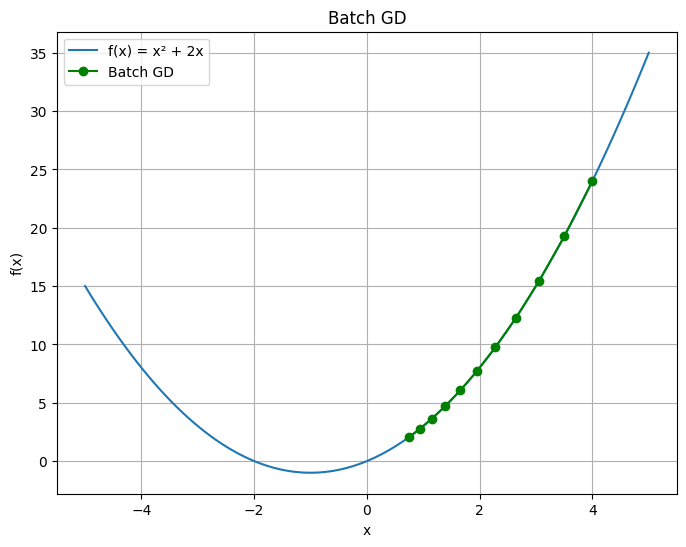

In [ ]:
# Batch Gradient Descent
x_batch = x_init
eta = 0.05  
x_batch_history = [x_batch]

for _ in range(iterations):
    """Update rule: x = x - eta * gradient (simulated full data)"""
    x_batch = x_batch - eta * grad_f_batch(x_batch)
    x_batch_history.append(x_batch)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_batch(x_vals), label='f(x) = x² + 2x')
plt.plot(x_batch_history, [f_batch(x) for x in x_batch_history], 'go-', label='Batch GD')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Batch GD')
plt.legend()
plt.grid()
plt.show()

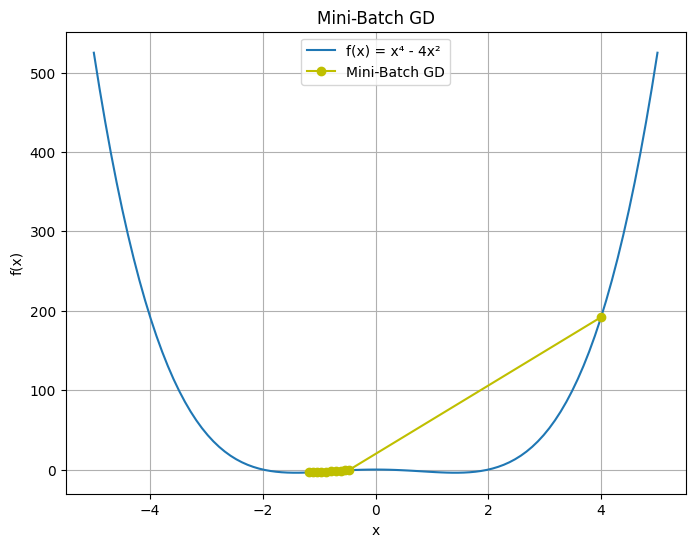

In [ ]:
# Mini-Batch Gradient Descent
x_mini = x_init
eta = 0.02  # Small learning rate due to steep gradients
x_mini_history = [x_mini]

for _ in range(iterations):
    """Update rule: x = x - eta * gradient (simulated mini-batch)"""
    x_mini = x_mini - eta * grad_f_mini(x_mini)
    x_mini_history.append(x_mini)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_mini(x_vals), label='f(x) = x⁴ - 4x²')
plt.plot(x_mini_history, [f_mini(x) for x in x_mini_history], 'yo-', label='Mini-Batch GD')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Mini-Batch GD')
plt.legend()
plt.grid()
plt.show()

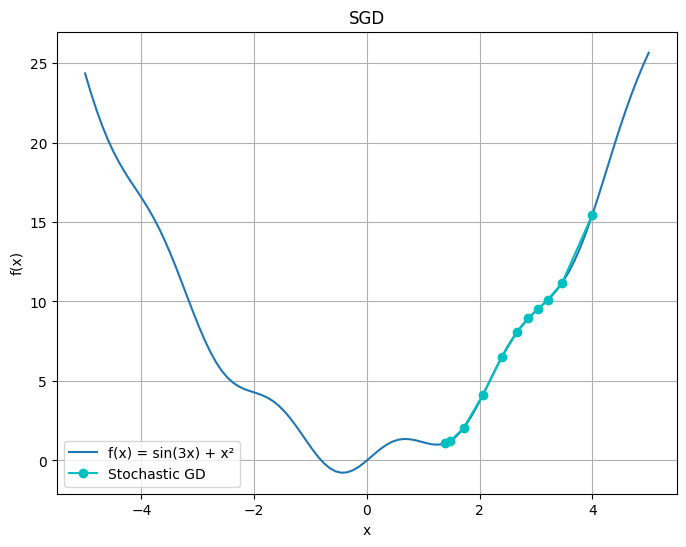

In [ ]:
# Stochastic Gradient Descent
x_sgd = x_init
eta = 0.05  # Moderate learning rate with noise
x_sgd_history = [x_sgd]

for _ in range(iterations):
    """Update rule: x = x - eta * (gradient + noise) to simulate randomness"""
    noise = np.random.normal(0, 0.2)  # Larger noise for oscillation
    x_sgd = x_sgd - eta * (grad_f_sgd(x_sgd) + noise)
    x_sgd_history.append(x_sgd)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_sgd(x_vals), label='f(x) = sin(3x) + x²')
plt.plot(x_sgd_history, [f_sgd(x) for x in x_sgd_history], 'co-', label='Stochastic GD')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('SGD')
plt.legend()
plt.grid()
plt.show()

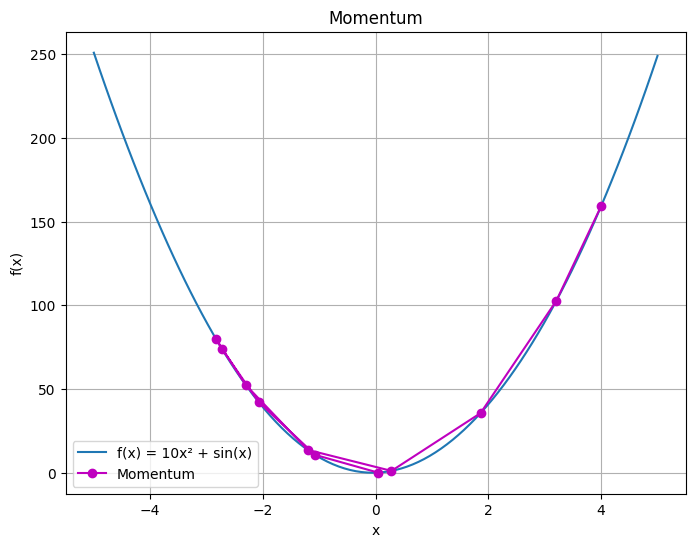

In [ ]:
# Momentum
x_momentum = x_init
v = 0  # Initial velocity
gamma = 0.9  # High momentum
eta = 0.01  # Small learning rate
x_momentum_history = [x_momentum] 

for _ in range(iterations):
    """Update rule: v = gamma * v + eta * gradient; x = x - v"""
    v = gamma * v + eta * grad_f_momentum(x_momentum)
    x_momentum = x_momentum - v
    x_momentum_history.append(x_momentum)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_momentum(x_vals), label='f(x) = 10x² + sin(x)')
plt.plot(x_momentum_history, [f_momentum(x) for x in x_momentum_history], 'mo-', label='Momentum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Momentum')
plt.legend()
plt.grid()
plt.show()

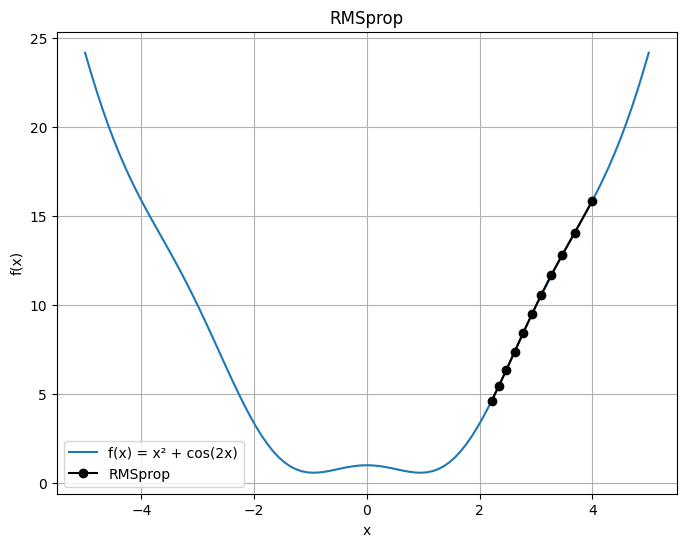

In [ ]:
# RMSprop
x_rms = x_init
v = 0  # Initial moving average of squared gradients
rho = 0.9  # Smoothing constant
eta = 0.1  # Larger learning rate
epsilon = 1e-8
x_rms_history = [x_rms]

for _ in range(iterations):
    """Update rule: v = rho * v + (1 - rho) * gradient^2; x = x - eta * gradient / sqrt(v + epsilon)"""
    g = grad_f_rmsprop(x_rms)
    v = rho * v + (1 - rho) * g**2
    x_rms = x_rms - eta * g / (np.sqrt(v) + epsilon)
    x_rms_history.append(x_rms)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_rmsprop(x_vals), label='f(x) = x² + cos(2x)')
plt.plot(x_rms_history, [f_rmsprop(x) for x in x_rms_history], 'ko-', label='RMSprop')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('RMSprop')
plt.legend()
plt.grid()
plt.show()

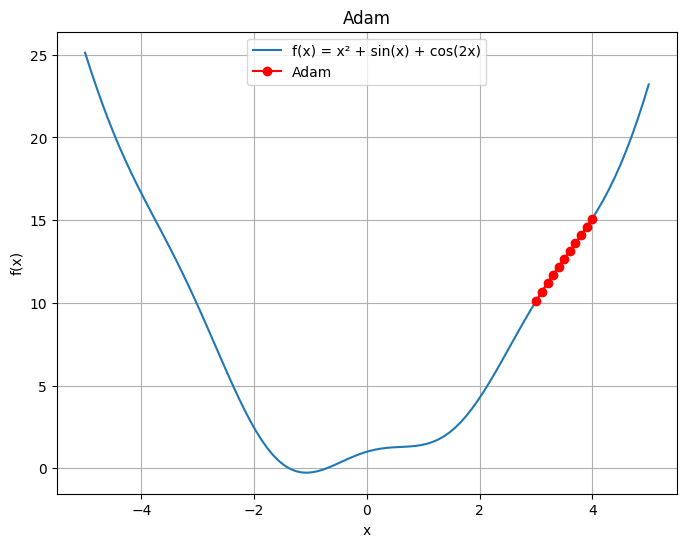

In [ ]:
# Adam
x_adam = x_init
m = 0  # First moment
v = 0  # Second moment
beta1 = 0.9
beta2 = 0.999
eta = 0.1  # Moderate learning rate with adaptive moments
epsilon = 1e-8
x_adam_history = [x_adam]

for t in range(1, iterations + 1):
    """Update rule: 
       m = beta1 * m + (1 - beta1) * gradient
       v = beta2 * v + (1 - beta2) * gradient^2
       m_hat = m / (1 - beta1^t), v_hat = v / (1 - beta2^t)
       x = x - eta * m_hat / sqrt(v_hat + epsilon)"""
    g = grad_f_adam(x_adam)
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * g**2
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    x_adam = x_adam - eta * m_hat / (np.sqrt(v_hat) + epsilon)
    x_adam_history.append(x_adam)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_adam(x_vals), label='f(x) = x² + sin(x) + cos(2x)')
plt.plot(x_adam_history, [f_adam(x) for x in x_adam_history], 'ro-', label='Adam')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Adam')
plt.legend()
plt.grid()
plt.show()